Pair Programming Limpieza I
En este ejercicio trabajaremos con un csv nuevo. En concreto trabajaremos con datos de banca/marketing. Este conjunto de datos contiene información sobre campañas de marketing bancario, incluyendo detalles como la edad, el trabajo, el estado civil, etc. En concreto estos datos son de una campaña de marketing para la venta de un producto o servicio, la columna ("y") parece indicar si el cliente ha aceptado la oferta o no.
Tenemos distintos tipos de variables en el dataset, veamos que significan:
Datos del cliente bancario:
age: (numérico)
job : tipo de trabajo (categórico: "administrativo", "obrero", "empresario", "empleada del hogar", "directivo", "jubilado", "autónomo", "servicios", "estudiante", "técnico", "desempleado")
marital : estado civil (categórico: "divorciado", "casado", "soltero". Nota: "divorciado" significa divorciado o viudo)
education (categórica: "básica.4a", "básica.6a", "básica.9a", "secundaria", "analfabeto", "curso.profesional", "título.universitario")
default: ¿tiene crédito en mora? (categórico: O: "no", 1: "sí")
housing: ¿tiene préstamo para vivienda? (categórico: 0: "no", 1: "sí")
loan: ¿tiene préstamo personal? (categórico: 0: "no", 1: "sí")
Datos relacionados con el último contacto de la campaña actual:
contact: tipo de comunicación del contacto (categórico: "móvil", "teléfono")
month_day_week: lista con el año del último contacto (categórico: "ene", "feb", "mar", ..., "nov", "dic") y el día de la semana del último contacto (categorical: "mon", "tue", "wed", "thu", "fri")
duration: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al objetivo de salida (por ejemplo, si duration=0 entonces y="no"). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, es obvio que y se conoce una vez finalizada la llamada. Por lo tanto, esta entrada sólo debería incluirse a efectos de evaluación comparativa y debería descartarse si la intención es tener un modelo predictivo realista.
Otras variables:
campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
pdays: número de días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
poutcome: resultado de la campaña de marketing anterior (categórico: "fracaso", "inexistente", "éxito")
y: ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no")
Variables de contexto social y económico:
emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
euribor3`m: tipo euribor a 3 meses - indicador diario (numérico)
nr.employed: número de empleados - indicador trimestral (numérico)
​
Hipótesis
La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.
El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.
Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.
Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.
​
Entre las tareas que tendréis que hacer hoy:

    1. Explora el dataset con los métodos que hemos ido aprendiendo hasta ahora para familiarizarnos con los datos.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../datos/bank-additional-full.csv", index_col = 0)

In [5]:
df.shape

(43170, 20)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [7]:
df.isnull().sum() * 100/ df.shape[0]

age                0.000000
job                0.803799
marital            0.196896
education          4.204309
default           20.884874
housing            2.388233
loan               2.388233
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
month_day_week     0.000000
dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43170.0,40.014918,10.407327,17.0,32.0,38.0,47.0,98.0
default,34154.0,0.000088,0.009372,0.0,0.0,0.0,0.0,1.0
housing,42139.0,0.535869,0.498718,0.0,0.0,1.0,1.0,1.0
loan,42139.0,0.155652,0.362529,0.0,0.0,0.0,0.0,1.0
duration,43170.0,257.883739,259.393738,0.0,102.0,179.0,319.0,4918.0
campaign,43170.0,2.564675,2.768538,1.0,1.0,2.0,3.0,56.0
pdays,43170.0,962.452282,186.962379,0.0,999.0,999.0,999.0,999.0
previous,43170.0,0.173639,0.496750,0.0,0.0,0.0,0.0,7.0
emp.var.rate,43170.0,0.078177,1.572217,-3.4,-1.8,1.1,1.4,1.4


    2. Cambia el nombre de las columnas para que no tengan puntos en el nombre. En concreto, reemplazad los "." por comas.


In [9]:
nuevas_columnas = {col : col.replace(".", ",") for col in df.columns}
df.rename(columns = nuevas_columnas, inplace= True)

In [10]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


    3. ¿Hay valores duplicados en nuestro dataframe? En caso de que los haya, eliminándlos.


In [11]:
df.duplicated().sum()

1994

In [12]:
df.drop_duplicates(subset = df, inplace = True)

In [13]:
df.shape

(41176, 20)

In [14]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


    4. Como hemos visto, algunas columnas no tienen el tipo de datos que deberían. Cambiad el tipo de dato para las columnas de cons.price.idx, cons.conf.idx, euribor3m, nr.employed.


In [15]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx     object
cons,conf,idx      object
euribor3m          object
nr,employed        object
y                  object
month_day_week     object
dtype: object

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [17]:
import numpy as np

In [18]:
def cambiar_coma_punto(columna):
    try: 
        return float(columna.replace(",", "."))
    except:
        return np.nan
        

In [19]:
lista_columnas = ["cons,price,idx", "cons,conf,idx", "euribor3m", "nr,employed"]

In [20]:
for columna in lista_columnas:
    df[columna] = df[columna].apply(cambiar_coma_punto)

In [21]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx    float64
cons,conf,idx     float64
euribor3m         float64
nr,employed       float64
y                  object
month_day_week     object
dtype: object

    5. En las columnas de marital y month, poner todos los valores en minúsculas.
    💡Pista Podréis usar una función o una lambda 💡


In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"


In [23]:
df[['marital', 'poutcome']] = df[['marital', 'poutcome']].apply(lambda x: x.str.lower())

In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
1,57,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
2,37,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
4,56,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"



    6. Para no olvidarnos de la visualización. A través de la visualización, podemos detectar errores, valores atípicos, valores faltantes y otros problemas comunes en los datos que de otra manera podrían ser difíciles de identificar. Para esto vamos a hacer una serie de gráficas que deberán ser incluidas en un subplot. Estas gráficas tienen que ser:


        6.1. Una gráfica donde podamos ver si el tipo de trabajo afecta a que un cliente acepte la oferta.
        6.2. Una gráfica donde podamos ver si el hecho de que un cliente tenga una hipoteca afecta a que acepte la oferta.
        6.3 Una gráfica donde podamos ver si el hecho de que un cliente tenga un prestamo afecta a que acepte la oferta.
        6.4. Una gráfica donde podamos ver si hay una relación entre el numero de días desde el último contacto afecta a que un cliente acepte la oferta
        6.5. Una gráfica donde podamos ver si hay relación entre el resultado de la campaña anterior y si el cliente afecta a que el cliente acepte la oferta.


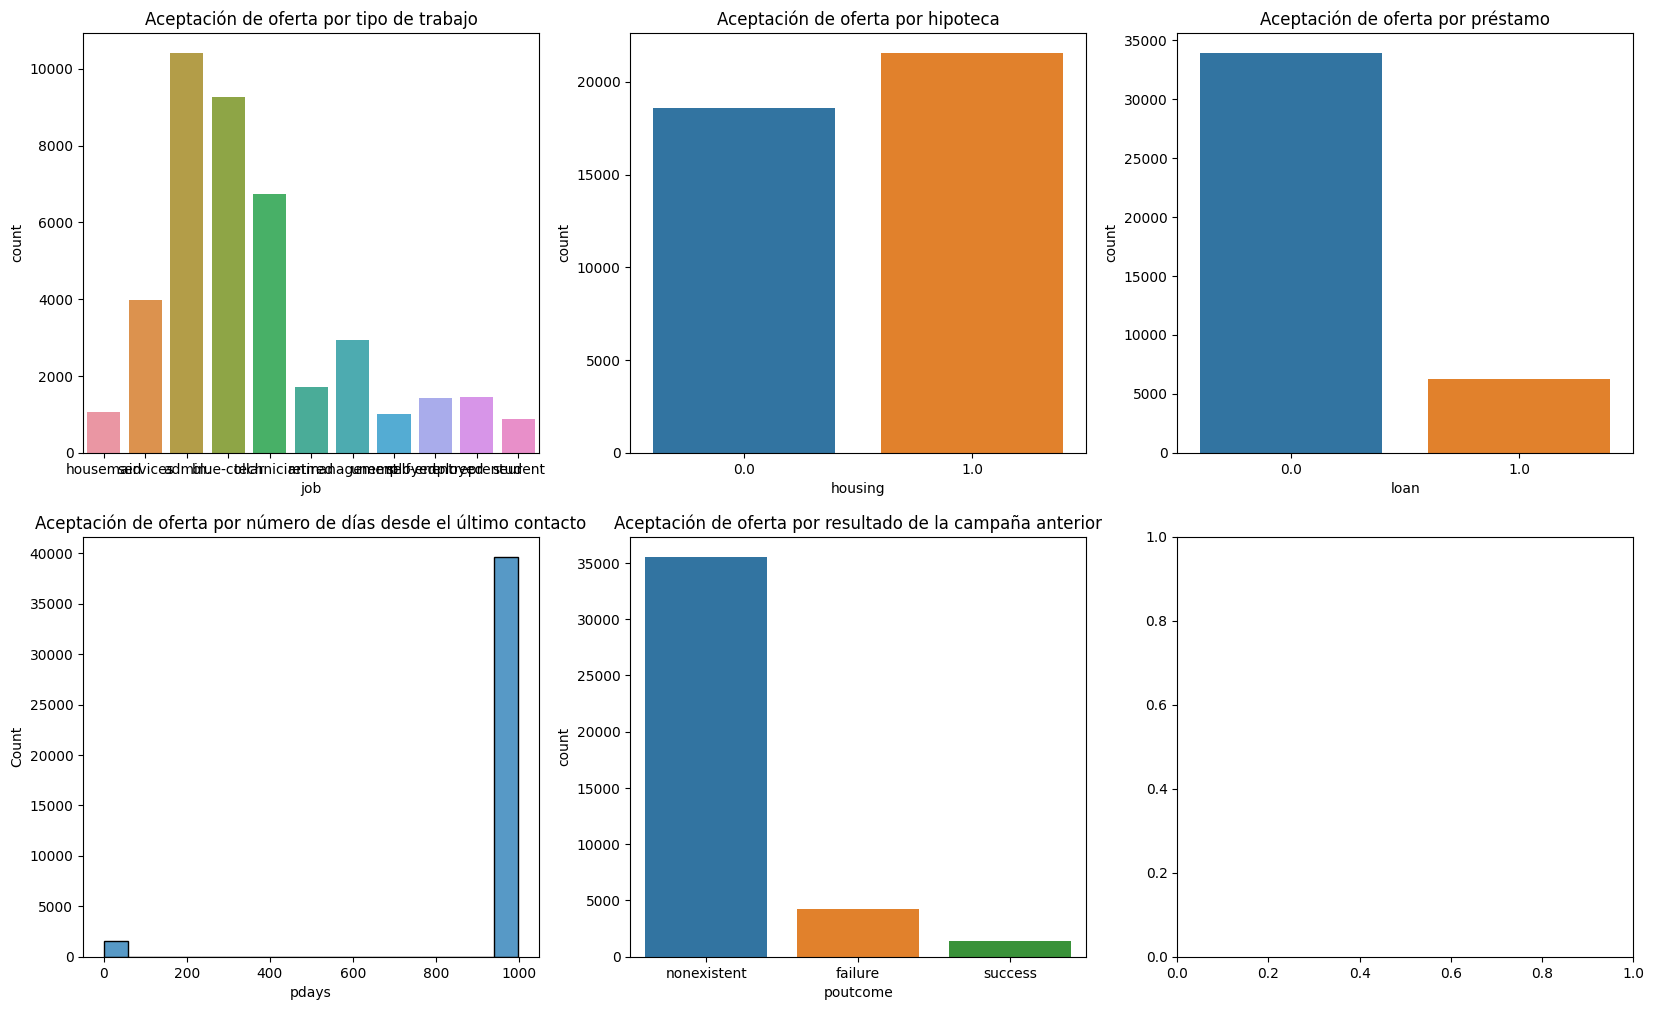

In [30]:

# Crear un subplot con 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Gráfica 6.1
sns.countplot(x='job',  data=df, ax=axes[0, 0])
axes[0, 0].set_title('Aceptación de oferta por tipo de trabajo')

# Gráfica 6.2
sns.countplot(x='housing', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Aceptación de oferta por hipoteca')

# Gráfica 6.3
sns.countplot(x='loan',  data=df, ax=axes[0, 2])
axes[0, 2].set_title('Aceptación de oferta por préstamo')

# Gráfica 6.4
sns.histplot(data=df, x='pdays', ax=axes[1, 0])
axes[1, 0].set_title('Aceptación de oferta por número de días desde el último contacto')

# Gráfica 6.5
sns.countplot(x='poutcome', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Aceptación de oferta por resultado de la campaña anterior')

# Mostrar el subplot
plt.show()

Nos hemos dado cuenta que la columna "pdays" habria que cambiar el dato 999 (nunca ha recibido contacto) y convertirlos a Si o No.

    7. Guardamos el csv para seguir trabajando en el siguiente ejercicio de pair de limpieza.

In [26]:
df.to_csv("bank_additional_edit.csv")